In [ ]:
!pip install torch torchvision matplotlib numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install kaggle kagglehub


In [ ]:
from google.colab import files

# This will open a file upload dialog
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keshav0101","key":"8419ae81db69549b45016bf992842420"}'}

In [ ]:
!mkdir -p ~/.kaggle  # Create a folder for Kaggle API key
!mv kaggle.json ~/.kaggle/  # Move the file to this folder
!chmod 600 ~/.kaggle/kaggle.json  # Set correct permissions


In [ ]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)


100%|██████████| 149M/149M [00:05<00:00, 27.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"

# List files and folders inside the dataset
print(os.listdir(dataset_path))


['Testing', 'Training']


In [ ]:
!cp -r "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1" "/content/brain_tumor_dataset"


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"

# List the files and folders in the dataset
print(os.listdir(dataset_path))


['Testing', 'Training']


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"

# List contents of Training and Testing directories
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

print("Training folder contents:", os.listdir(train_path))
print("Testing folder contents:", os.listdir(test_path))


Training folder contents: ['glioma', 'pituitary', 'meningioma', 'notumor']
Testing folder contents: ['glioma', 'pituitary', 'meningioma', 'notumor']


In [ ]:
import os

train_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training"
test_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing"

# Function to count images in each category
def count_images(path):
    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        if os.path.isdir(category_path):
            print(f"{category}: {len(os.listdir(category_path))} images")

print("Training Data:")
count_images(train_path)

print("\nTesting Data:")
count_images(test_path)


Training Data:
glioma: 1321 images
pituitary: 1457 images
meningioma: 1339 images
notumor: 1595 images

Testing Data:
glioma: 300 images
pituitary: 300 images
meningioma: 306 images
notumor: 405 images


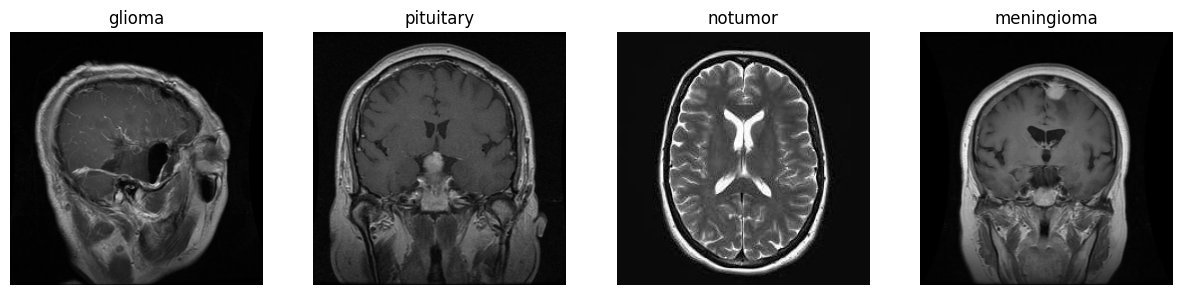

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# Function to display sample images
def show_sample_images(dataset_path, categories):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i, category in enumerate(categories):
        image_dir = os.path.join(dataset_path, category)
        image_files = os.listdir(image_dir)

        random_image = random.choice(image_files)
        image_path = os.path.join(image_dir, random_image)

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display image
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(category)

    plt.show()

# List of categories
categories = ["glioma", "pituitary", "notumor", "meningioma"]

# Show sample images from Training data
show_sample_images(train_path, categories)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Define paths
train_dir = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training"
test_dir = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing"

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,   # Rotate images randomly
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only normalize for testing

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Training set
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Validation set
)

# Load test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No shuffling for test set
)

# Print class labels
print("Class labels:", train_generator.class_indices)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class labels: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten the feature maps into a vector
    Flatten(),

    # Fully connected layers
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(4, activation='softmax')  # Output layer (4 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Increase if needed
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.4318 - loss: 1.2014 - val_accuracy: 0.6117 - val_loss: 0.9894
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.6611 - loss: 0.7910 - val_accuracy: 0.6906 - val_loss: 0.8698
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.7260 - loss: 0.6875 - val_accuracy: 0.6687 - val_loss: 0.8541
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.7320 - loss: 0.6646 - val_accuracy: 0.7038 - val_loss: 0.8095
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.7644 - loss: 0.5999 - val_accuracy: 0.7152 - val_loss: 0.7567
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.7953 - loss: 0.5300 - val_accuracy: 0.7458 - val_loss: 0.7031
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.7877 - loss: 0.5297 - val_accuracy: 0.7301 - val_loss: 0.7329
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8105 - loss: 0.4824 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 524ms/step - accuracy: 0.5919 - loss: 1.1543
Test Accuracy: 74.83%
Test Loss: 0.7413


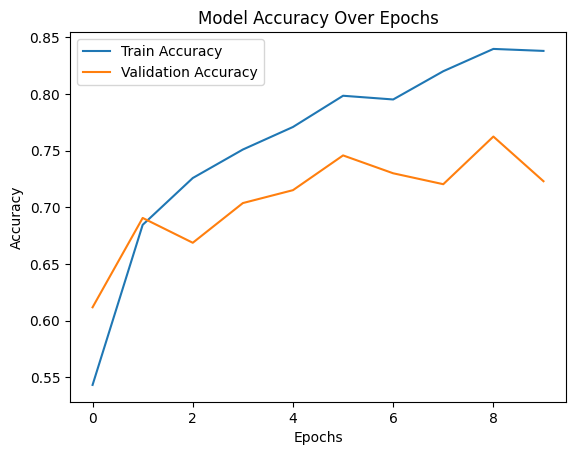

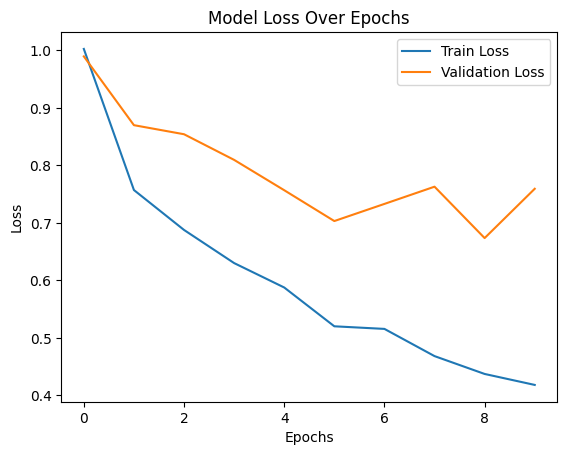

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

In [ ]:
model.save("brain_tumor_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os


In [ ]:
model_path = "/content/brain_tumor_model.h5"

# Load the trained model
model = tf.keras.models.load_model(model_path)

print("Model Loaded Successfully!")

Model Loaded Successfully!


In [ ]:
img_path = "/content/brain_tumor_dataset/Testing/glioma/Te-gl_0038.jpg"

# Check if the file exists
if not os.path.exists(img_path):
    print(f"Error: Image file not found at {img_path}")
else:
    print(f"Image file found: {img_path}")


Image file found: /content/brain_tumor_dataset/Testing/glioma/Te-gl_0038.jpg


In [ ]:
# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values to [0,1]

print("Image Preprocessing Done!")


Image Preprocessing Done!


In [ ]:
# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get the index of the highest probability

# Define the class labels (Make sure these match the labels from your training)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Print the prediction result
print(f"Predicted Tumor Type: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Tumor Type: glioma
